In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow	import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras import layers

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import Normalizer
from sklearn.metrics import r2_score

In [3]:
# load admissions data
admissions_data = pd.read_csv("admissions_data.csv")
admissions_data.head()


,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
# mark predicted values
labels = admissions_data.iloc[:,-1]
labels.describe()


count    500.00000
mean       0.72174
std        0.14114
min        0.34000
25%        0.63000
50%        0.72000
75%        0.82000
max        0.97000
Name: Chance of Admit , dtype: float64

In [7]:
# mark features
features = admissions_data.iloc[:, 1:8]


In [8]:
#split our training and test set
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.25, random_state = 42)


In [9]:
# standardizing our data by scaling it
sc = StandardScaler()
features_train_scale = sc.fit_transform(features_train)
features_test_scale = sc.transform(features_test)


In [10]:
# function to design the model
def design_model(feature_data):
	model = Sequential()
	num_features = feature_data.shape[1]
	input = tf.keras.Input(shape=(num_features))
	model.add(input)
	# this model has two hidden layers and two dropout layers
	# relu activation function is used at both hidden layers
	hidden_layer = layers.Dense(16, activation='relu')
	model.add(hidden_layer)
	model.add(layers.Dropout(0.1))
	hidden_layer_2 = layers.Dense(8, activation='relu')
	model.add(hidden_layer_2)
	model.add(layers.Dropout(0.2))
	model.add(layers.Dense(1))

	# using an adam optimizer with a learning rate of 0.005
	# using mean-squared error as our loss function and mean average error as our metric
	opt = keras.optimizers.Adam(learning_rate=0.005)
	model.compile(loss='mse', metrics=['mae'], optimizer=opt)
	return model


In [11]:
model = design_model(features_train_scale)
model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 16)                128       
                                                                 
 dropout (Dropout)           (None, 16)                0         
                                                                 
 dense_1 (Dense)             (None, 8)                 136       
                                                                 
 dropout_1 (Dropout)         (None, 8)                 0         
                                                                 
 dense_2 (Dense)             (None, 1)                 9         
                                                                 
Total params: 273
Trainable params: 273
Non-trainable params: 0
_________________________________________________________________


In [9]:
# apply early stopping for efficiency
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=20)


In [10]:
# fit the model with 100 epochs and a batch size of 8
# validation split at 0.25
history = model.fit(features_train_scale, labels_train.to_numpy(), epochs=100, batch_size=8, verbose=1, validation_split=0.25, callbacks=[es])



Epoch 1/100
36/36 [==============================] - 2s 13ms/step - loss: 0.1951 - mae: 0.3531 - val_loss: 0.0737 - val_mae: 0.2273
Epoch 2/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0770 - mae: 0.2121 - val_loss: 0.0350 - val_mae: 0.1583
Epoch 3/100
36/36 [==============================] - 0s 4ms/step - loss: 0.0592 - mae: 0.1897 - val_loss: 0.0206 - val_mae: 0.1168
Epoch 4/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0367 - mae: 0.1558 - val_loss: 0.0193 - val_mae: 0.1147
Epoch 5/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0296 - mae: 0.1359 - val_loss: 0.0182 - val_mae: 0.1162
Epoch 6/100
36/36 [==============================] - 0s 2ms/step - loss: 0.0262 - mae: 0.1286 - val_loss: 0.0106 - val_mae: 0.0841
Epoch 7/100
36/36 [==============================] - 0s 3ms/step - loss: 0.0239 - mae: 0.1208 - val_loss: 0.0106 - val_mae: 0.0843
Epoch 8/100
36/36 [==============================] - 0s 5ms/step - loss: 0.0178 - 

In [11]:
# evaluate the model
val_mse, val_mae = model.evaluate(features_test_scale, labels_test.to_numpy(), verbose = 0)

# view the MAE performance
print("MAE: ", val_mae)

MAE:  0.05353236570954323


In [12]:
# evauate r-squared score
y_pred = model.predict(features_test_scale)

print(r2_score(labels_test,y_pred))


0.753496188744216


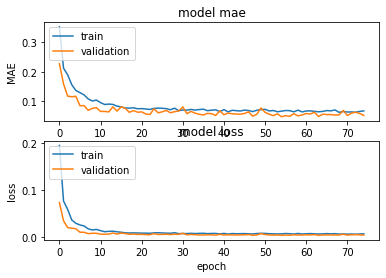

In [15]:
# plot MAE and val_MAE over each epoch
fig = plt.figure()
ax1 = fig.add_subplot(2, 1, 1)
ax1.plot(history.history['mae'])
ax1.plot(history.history['val_mae'])
ax1.set_title('model mae')
ax1.set_ylabel('MAE')
ax1.set_xlabel('epoch')
ax1.legend(['train', 'validation'], loc='upper left')
# Plot loss and val_loss over each epoch
ax2 = fig.add_subplot(2, 1, 2)
ax2.plot(history.history['loss'])
ax2.plot(history.history['val_loss'])
ax2.set_title('model loss')
ax2.set_ylabel('loss')
ax2.set_xlabel('epoch')
ax2.legend(['train', 'validation'], loc='upper left')

plt.show()